# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from chart_studio.plotly import plot, iplot
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('train_data.csv',nrows=50000)
resource_data = pd.read_csv('resources.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (50000, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

## 1.2 preprocessing of `project_subject_categories`

In [5]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [6]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 preprocessing of `school_state`

In [7]:
school_states = list(project_data['school_state'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

school_states_list = []
for i in school_states:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    school_states_list.append(temp.strip())

project_data.drop(['school_state'], axis=1, inplace=True)
project_data['school_state'] = school_states_list


# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['school_state'].values:
    my_counter.update(word.split())
    
school_states_dict = dict(my_counter)
sorted_school_states_dict = dict(sorted(school_states_dict.items(), key=lambda kv: kv[1]))

## 1.3 preprocessing of `teacher_prefix`

In [8]:
#NaN values in techer prefix will create a problem while encoding,so we replace NaN values with the mode of that particular column
#removing dot(.) since it is a special character
mode_of_teacher_prefix = project_data['teacher_prefix'].value_counts().index[0]


project_data['teacher_prefix'] = project_data['teacher_prefix'].fillna(mode_of_teacher_prefix)

In [9]:
prefixes = []

for i in range(len(project_data)):
    a = project_data["teacher_prefix"][i].replace(".", "")
    prefixes.append(a)

In [10]:
project_data.drop(['teacher_prefix'], axis = 1, inplace = True)
project_data["teacher_prefix"] = prefixes
print("After removing the special characters ,Column values:  ")
np.unique(project_data["teacher_prefix"].values)

After removing the special characters ,Column values:  


array(['Dr', 'Mr', 'Mrs', 'Ms', 'Teacher'], dtype=object)

## 1.3 preprocessing of `project_grade_category`

In [11]:
# We need to get rid of The spaces between the text and the hyphens because they're special characters.
#Rmoving multiple characters from a string in Python
#https://stackoverflow.com/questions/3411771/multiple-character-replace-with-python

project_grade_category = []

for i in range(len(project_data)):
    a = project_data["project_grade_category"][i].replace(" ", "_").replace("-", "_")
    project_grade_category.append(a)

In [12]:
project_data.drop(['project_grade_category'], axis = 1, inplace = True)
project_data["project_grade_category"] = project_grade_category 
print("After removing the special characters ,Column values:  ")
np.unique(project_data["project_grade_category"].values)

After removing the special characters ,Column values:  


array(['Grades_3_5', 'Grades_6_8', 'Grades_9_12', 'Grades_PreK_2'],
      dtype=object)

## 1.3 Text preprocessing

In [13]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [14]:
project_data.head(2)

Unnamed: 0       id                        teacher_id  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a   

  project_submitted_datetime  \
0        2016-12-05 13:43:57   
1        2016-10-25 09:22:10   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories           clean_subcategories school_state  \
0             Literacy_Language                  ESL Literacy           IN   
1  History_Civics Health_Sports  Civics_Government TeamSports           FL   

  teacher_prefix project_grade_category  \
0            Mrs          Grades_PreK_2   
1             Mr             Grades_6_8   

                                               essay  
0  My students are English learners that are work...  
1  Our students arrive to our school eager to lea...

In [15]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [16]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations. \r\n\r\nThe materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills. \r\nThey also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing

In [17]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations.     The materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills.   They also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing. Phys

In [18]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays cognitive delays gross fine motor delays to autism They are eager beavers and always strive to work their hardest working past their limitations The materials we have are the ones I seek out for my students I teach in a Title I school where most of the students receive free or reduced price lunch Despite their disabilities and limitations my students love coming to school and come eager to learn and explore Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting This is how my kids feel all the time The want to be able to move as they learn or so they say Wobble chairs are the answer and I love then because they develop their core which enhances gross motor and in Turn fine motor skills They also want to learn through games my kids do not want to sit and do worksheets They want to learn to count by jumping and playing Physical engagement is the

In [19]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [20]:
#convert all the words to lower case first and then remove the stopwords
for i in range(len(project_data['essay'].values)):
    project_data['essay'].values[i] = project_data['essay'].values[i].lower()
    

In [21]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    sent = sent.replace('nan',' ')
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|██████████| 50000/50000 [00:20<00:00, 2487.04it/s]


In [22]:
# after preprocesing
preprocessed_essays[20000]

'kindergarten students varied disabilities ranging speech language delays cognitive delays gross fine motor delays autism eager beavers always strive work hardest working past limitations materials ones seek students teach title school students receive free reduced price lunch despite disabilities limitations students love coming school come eager learn explore ever felt like ants pants needed groove move meeting kids feel time want able move learn say wobble chairs answer love develop core enhances gross motor turn fine motor skills also want learn games kids not want sit worksheets want learn count jumping playing physical engagement key success number toss color shape mats make happen students forget work fun 6 year old deserves'

In [23]:
#creating a new column with the preprocessed essays and replacing it with the original columns
project_data['preprocessed_essays'] = preprocessed_essays
project_data.drop(['project_essay_1'], axis=1, inplace=True)
project_data.drop(['project_essay_2'], axis=1, inplace=True)
project_data.drop(['project_essay_3'], axis=1, inplace=True)
project_data.drop(['project_essay_4'], axis=1, inplace=True)

In [24]:
essay_word_count=[]
for i in range(len(project_data['preprocessed_essays'])):
    essay_word_count.append(len(project_data['preprocessed_essays'][i].split()))

In [25]:
len(project_data['preprocessed_essays'][1].split())

98

In [26]:
essay_word_count[1]

98

In [27]:
project_data['essay_word_count'] = essay_word_count

In [28]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
neg=[];pos=[];neu=[]; compound = []

for i in tqdm(range(len(project_data['preprocessed_essays']))):
    sentiment_scores = analyzer.polarity_scores(project_data['preprocessed_essays'][i])
    neg.append(sentiment_scores['neg'])
    pos.append(sentiment_scores['pos'])
    neu.append(sentiment_scores['neu'])    
    compound.append(sentiment_scores['compound'])    


100%|██████████| 50000/50000 [01:00<00:00, 827.03it/s]


In [29]:
#new columns indicating the sentiment score of each project essay
project_data['neg'] = neg
project_data['neu'] = neu
project_data['pos'] = pos
project_data['compound'] = compound

In [30]:
project_data.head()

Unnamed: 0       id                        teacher_id  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a   
2       21895  p182444  3465aaf82da834c0582ebd0ef8040ca0   
3          45  p246581  f3cb9bffbba169bef1a77b243e620b60   
4      172407  p104768  be1f7507a41f8479dc06f047086a39ec   

  project_submitted_datetime  \
0        2016-12-05 13:43:57   
1        2016-10-25 09:22:10   
2        2016-08-31 12:03:56   
3        2016-10-06 21:16:17   
4        2016-07-11 01:10:09   

                                       project_title  \
0   Educational Support for English Learners at Home   
1              Wanted: Projector for Hungry Learners   
2  Soccer Equipment for AWESOME Middle School Stu...   
3                             Techie Kindergarteners   
4                             Interactive Math Tools   

                            project_resource_summary  \
0  My students need opportunities to practice beg...   
1  My students need a projector to help with view...   
2  My students need shine guards, athletic socks,...   
3  My students need to engage in Reading and Math...   
4  My students need hands on practice in mathemat...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   
2                                             1                    0   
3                                             4                    1   
4                                             1                    1   

                 clean_categories           clean_subcategories school_state  \
0               Literacy_Language                  ESL Literacy           IN   
1    History_Civics Health_Sports  Civics_Government TeamSports           FL   
2                   Health_Sports    Health_Wellness TeamSports           AZ   
3  Literacy_Language Math_Science          Literacy Mathematics           KY   
4                    Math_Science                   Mathematics           TX   

  teacher_prefix project_grade_category  \
0            Mrs          Grades_PreK_2   
1             Mr             Grades_6_8   
2             Ms             Grades_6_8   
3            Mrs          Grades_PreK_2   
4            Mrs          Grades_PreK_2   

                                               essay  \
0  my students are english learners that are work...   
1  our students arrive to our school eager to lea...   
2  \r\n\"true champions aren't always the ones th...   
3  i work at a unique school filled with both esl...   
4  our second grade classroom next year will be m...   

                                 preprocessed_essays  essay_word_count    neg  \
0  students english learners working english seco...               148  0.013   
1  students arrive school eager learn polite gene...                98  0.052   
2  true champions not always ones win guts mia ha...               188  0.128   
3  work unique school filled esl english second l...               111  0.111   
4  second grade classroom next year made around 2...               111  0.070   

     neu    pos  compound  
0  0.832  0.155    0.9694  
1  0.641  0.307    0.9856  
2  0.643  0.230    0.9816  
3  0.632  0.258    0.9656  
4  0.777  0.152    0.8524

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [31]:
#convert all the words to lower case first and then remove the stopwords
for i in range(len(project_data['project_title'].values)):
    project_data['project_title'].values[i] = project_data['project_title'].values[i].lower()

In [32]:
# similarly you can preprocess the titles also
preprocessed_titles = []
# tqdm is for printing the status bar
for sentence in tqdm(project_data['project_title'].values):
    sent = decontracted(sentence)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    sent = sent.replace('nan',' ')
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_titles.append(sent.lower().strip())

100%|██████████| 50000/50000 [00:00<00:00, 58755.97it/s]


In [33]:
#creating a new column with the preprocessed titles,useful for analysis
project_data['preprocessed_titles'] = preprocessed_titles

In [34]:
title_word_count=[]
for i in range(len(project_data['preprocessed_titles'])):
    title_word_count.append(len(project_data['preprocessed_titles'][i].split())) 

In [35]:
project_data['title_word_count'] = title_word_count

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [36]:
# train test split

from sklearn.model_selection import train_test_split

project_data_train, project_data_test, y_train, y_test = train_test_split(project_data, project_data['project_is_approved'], test_size=0.33, stratify = project_data['project_is_approved'])

In [37]:
print("Split ratio")
print('-'*50)
print('Train dataset:',len(project_data_train)/len(project_data)*100,'%\n','size:',len(project_data_train))
print('-'*50)
print('Test dataset:',len(project_data_test)/len(project_data)*100,'%\n','size:',len(project_data_test))

Split ratio
--------------------------------------------------
Train dataset: 67.0 %
 size: 33500
--------------------------------------------------
Test dataset: 33.0 %
 size: 16500


In [38]:
#Features
project_data_train.drop(['project_is_approved'], axis=1, inplace=True)

project_data_test.drop(['project_is_approved'], axis=1, inplace=True) 

## 1.5 Preparing data for models

In [39]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'project_submitted_datetime',
       'project_title', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'school_state',
       'teacher_prefix', 'project_grade_category', 'essay',
       'preprocessed_essays', 'essay_word_count', 'neg', 'neu', 'pos',
       'compound', 'preprocessed_titles', 'title_word_count'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

<h2> Make Data Model Ready: encoding numerical, categorical features</h2>

### 1.5.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [40]:
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_cat = CountVectorizer()
vectorizer_cat.fit(project_data_train['clean_categories'].values) #fitting has to be on Train data

train_categories_one_hot = vectorizer_cat.transform(project_data_train['clean_categories'].values)

test_categories_one_hot = vectorizer_cat.transform(project_data_test['clean_categories'].values)


print(vectorizer_cat.get_feature_names())
print("Shape of training data matrix after one hot encoding ",train_categories_one_hot.shape)

print("Shape of test data matrix after one hot encoding ",test_categories_one_hot.shape)

['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']
Shape of training data matrix after one hot encoding  (33500, 9)
Shape of test data matrix after one hot encoding  (16500, 9)


In [41]:
# we use count vectorizer to convert the values into one 
vectorizer_subcat = CountVectorizer()
vectorizer_subcat.fit(project_data_train['clean_subcategories'].values)


train_subcategories_one_hot = vectorizer_subcat.transform(project_data_train['clean_subcategories'].values)

test_subcategories_one_hot = vectorizer_subcat.transform(project_data_test['clean_subcategories'].values)


print(vectorizer_subcat.get_feature_names())


print("Shape of train data matrix after one hot encoding ",train_subcategories_one_hot.shape)

print("Shape of test data matrix after one hot encoding ",test_subcategories_one_hot.shape)

['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']
Shape of train data matrix after one hot encoding  (33500, 30)
Shape of test data matrix after one hot encoding  (16500, 30)


In [42]:
## we use count vectorizer to convert the values into one hot encoded features

vectorizer_school_state = CountVectorizer()
vectorizer_school_state.fit(project_data_train['school_state'].values)



print(vectorizer_school_state.get_feature_names())

train_school_state_category_one_hot = vectorizer_school_state.transform(project_data_train['school_state'].values)


test_school_state_category_one_hot = vectorizer_school_state.transform(project_data_test['school_state'].values)


print("Shape of train data matrix after one hot encoding ",train_school_state_category_one_hot.shape)

print("Shape of test data matrix after one hot encoding ",test_school_state_category_one_hot.shape) 

['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']
Shape of train data matrix after one hot encoding  (33500, 51)
Shape of test data matrix after one hot encoding  (16500, 51)


In [43]:
#This step is to intialize a vectorizer with vocab from train data
my_counter = Counter()
for project_grade in project_data_train['project_grade_category'].values:
    my_counter.update(project_grade.split())

In [44]:
project_grade_cat_dict = dict(my_counter)
sorted_project_grade_cat_dict = dict(sorted(project_grade_cat_dict.items(), key=lambda kv: kv[1]))

In [45]:
## we use count vectorizer to convert the values into one hot encoded features

vectorizer_grade = CountVectorizer()
vectorizer_grade.fit(project_data_train['project_grade_category'].values)



print(vectorizer_grade.get_feature_names())

train_project_grade_category_one_hot = vectorizer_grade.transform(project_data_train['project_grade_category'].values)

test_project_grade_category_one_hot = vectorizer_grade.transform(project_data_test['project_grade_category'].values)


print("Shape of train data matrix after one hot encoding ",train_project_grade_category_one_hot.shape)

print("Shape of test data matrix after one hot encoding ",test_project_grade_category_one_hot.shape)

['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']
Shape of train data matrix after one hot encoding  (33500, 4)
Shape of test data matrix after one hot encoding  (16500, 4)


In [46]:
#https://stackoverflow.com/questions/39303912/tfidfvectorizer-in-scikit-learn-valueerror-np-nan-is-an-invalid-document
#ValueError: np.nan is an invalid document, expected byte or unicode string.
vectorizer_prefix = CountVectorizer()
vectorizer_prefix.fit(project_data_train['teacher_prefix'].values.astype("U"))


print(vectorizer_prefix.get_feature_names())


train_teacher_prefix_categories_one_hot = vectorizer_prefix.transform(project_data_train['teacher_prefix'].values.astype("U"))

test_teacher_prefix_categories_one_hot = vectorizer_prefix.transform(project_data_test['teacher_prefix'].values.astype("U"))

print("Shape of train data matrix after one hot encoding ",train_teacher_prefix_categories_one_hot.shape)

print("Shape of test data matrix after one hot encoding ",test_teacher_prefix_categories_one_hot.shape)

['dr', 'mr', 'mrs', 'ms', 'teacher']
Shape of train data matrix after one hot encoding  (33500, 5)
Shape of test data matrix after one hot encoding  (16500, 5)


<h2>Make Data Model Ready: encoding essay, and project_title</h2>

### 1.5.2 Vectorizing Text data

#### 1.5.2.1 Bag of words

In [47]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer_bow_essay = CountVectorizer(min_df=10)
vectorizer_bow_essay.fit(project_data_train['preprocessed_essays'].values)  #Fitting has to be on Train data


train_essay_bow = vectorizer_bow_essay.transform(project_data_train['essay'].values)

test_essay_bow = vectorizer_bow_essay.transform(project_data_test['essay'].values)


print("Shape of train data matrix after one hot encoding ",train_essay_bow.shape)

print("Shape of test data matrix after one hot encoding ",test_essay_bow.shape) 

Shape of train data matrix after one hot encoding  (33500, 10358)
Shape of test data matrix after one hot encoding  (16500, 10358)


In [48]:
# you can vectorize the title also 
# before you vectorize the title make sure you preprocess it

vectorizer_bow_title = CountVectorizer(min_df=10)
vectorizer_bow_title.fit_transform(project_data_train['preprocessed_titles'].values)    #Fitting has to be on Train data


train_title_bow = vectorizer_bow_title.transform(project_data_train['preprocessed_titles'].values)

test_title_bow = vectorizer_bow_title.transform(project_data_test['preprocessed_titles'].values)



print("Shape of train data matrix after one hot encoding ",train_title_bow.shape)

print("Shape of test data matrix after one hot encoding ",test_title_bow.shape)

Shape of train data matrix after one hot encoding  (33500, 1545)
Shape of test data matrix after one hot encoding  (16500, 1545)


#### 1.5.2.2 TFIDF vectorizer

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_tfidf_essay = TfidfVectorizer(min_df=10)
vectorizer_tfidf_essay.fit(project_data_train['preprocessed_essays'])      #Fitting has to be on Train data
 
train_essay_tfidf = vectorizer_tfidf_essay.transform(project_data_train['preprocessed_essays'].values)

test_essay_tfidf = vectorizer_tfidf_essay.transform(project_data_test['preprocessed_essays'].values)

print("Shape of train data matrix after one hot encoding ",train_essay_tfidf.shape)

print("Shape of test data matrix after one hot encoding ",test_essay_tfidf.shape)

Shape of train data matrix after one hot encoding  (33500, 10358)
Shape of test data matrix after one hot encoding  (16500, 10358)


In [50]:
vectorizer_tfidf_title = TfidfVectorizer( min_df=10)
vectorizer_tfidf_title.fit(project_data_train['preprocessed_titles'])      #Fitting has to be on Train data
 
train_title_tfidf = vectorizer_tfidf_title.transform(project_data_train['preprocessed_titles'].values)

test_title_tfidf = vectorizer_tfidf_title.transform(project_data_test['preprocessed_titles'].values)

print("Shape of train data matrix after one hot encoding ",train_title_tfidf.shape)

print("Shape of test data matrix after one hot encoding ",test_title_tfidf.shape)

Shape of train data matrix after one hot encoding  (33500, 1545)
Shape of test data matrix after one hot encoding  (16500, 1545)


#### 1.5.2.3 Using Pretrained Models: Avg W2V

In [51]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

'\n# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039\ndef loadGloveModel(gloveFile):\n    print ("Loading Glove Model")\n    f = open(gloveFile,\'r\', encoding="utf8")\n    model = {}\n    for line in tqdm(f):\n        splitLine = line.split()\n        word = splitLine[0]\n        embedding = np.array([float(val) for val in splitLine[1:]])\n        model[word] = embedding\n    print ("Done.",len(model)," words loaded!")\n    return model\nmodel = loadGloveModel(\'glove.42B.300d.txt\')\n\n# ============================\nOutput:\n    \nLoading Glove Model\n1917495it [06:32, 4879.69it/s]\nDone. 1917495  words loaded!\n\n# ============================\n\nwords = []\nfor i in preproced_texts:\n    words.extend(i.split(\' \'))\n\nfor i in preproced_titles:\n    words.extend(i.split(\' \'))\nprint("all the words in the coupus", len(words))\nwords = set(words)\nprint("the unique words in the coupus", len(words))\n\ninter_words = set(model.keys()).intersection(word

In [52]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [53]:
# average Word2Vec
# compute average word2vec for each review.
train_avg_w2v_essays = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(project_data_train['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    train_avg_w2v_essays.append(vector)

print(len(train_avg_w2v_essays))
print(len(train_avg_w2v_essays[0]))

100%|██████████| 33500/33500 [00:05<00:00, 5719.73it/s]

33500
300


In [54]:
# average Word2Vec
# compute average word2vec for each review.
test_avg_w2v_essays = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(project_data_test['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    test_avg_w2v_essays.append(vector)

print(len(test_avg_w2v_essays))
print(len(test_avg_w2v_essays[0]))

100%|██████████| 16500/16500 [00:02<00:00, 5708.83it/s]

16500
300


In [55]:
# average Word2Vec
# compute average word2vec for each review.
train_avg_w2v_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(project_data_train['preprocessed_titles']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    train_avg_w2v_titles.append(vector)

print(len(train_avg_w2v_titles))
print(len(train_avg_w2v_titles[0]))

100%|██████████| 33500/33500 [00:00<00:00, 105702.03it/s]

33500
300


In [56]:
# average Word2Vec
# compute average word2vec for each review.
test_avg_w2v_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(project_data_test['preprocessed_titles']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    test_avg_w2v_titles.append(vector)

print(len(test_avg_w2v_titles))
print(len(test_avg_w2v_titles[0]))

100%|██████████| 16500/16500 [00:00<00:00, 107634.91it/s]

16500
300


#### 1.5.2.3 Using Pretrained Models: TFIDF weighted W2V

In [57]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(project_data_train['preprocessed_essays'].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [58]:
# average Word2Vec
# compute average word2vec for each review.
train_tfidf_w2v_essays = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(project_data_train['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    train_tfidf_w2v_essays.append(vector)

print(len(train_tfidf_w2v_essays))
print(len(train_tfidf_w2v_essays[0]))

100%|██████████| 33500/33500 [00:39<00:00, 856.60it/s]

33500
300


In [59]:
# average Word2Vec
# compute average word2vec for each review.
test_tfidf_w2v_essays = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(project_data_test['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    test_tfidf_w2v_essays.append(vector)

print(len(test_tfidf_w2v_essays))
print(len(test_tfidf_w2v_essays[0]))

100%|██████████| 16500/16500 [00:19<00:00, 856.18it/s]

16500
300


In [60]:
# Similarly you can vectorize for title also
tfidf_model = TfidfVectorizer()
tfidf_model.fit(project_data_train['preprocessed_titles'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [61]:
# average Word2Vec
# compute average word2vec for each review.
train_tfidf_w2v_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(project_data_train['preprocessed_titles']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    train_tfidf_w2v_titles.append(vector)

print(len(train_tfidf_w2v_titles))
print(len(train_tfidf_w2v_titles[0]))

100%|██████████| 33500/33500 [00:00<00:00, 47508.32it/s]

33500
300


In [62]:
# average Word2Vec
# compute average word2vec for each review.
test_tfidf_w2v_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(project_data_test['preprocessed_titles']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    test_tfidf_w2v_titles.append(vector)

print(len(test_tfidf_w2v_titles))
print(len(test_tfidf_w2v_titles[0]))

100%|██████████| 16500/16500 [00:00<00:00, 48310.41it/s]

16500
300


### 1.5.3 Vectorizing Numerical features

In [63]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()

In [64]:
project_data_train = pd.merge(project_data_train, price_data, on='id', how='left')

project_data_test = pd.merge(project_data_test, price_data, on='id', how='left')

In [65]:
from sklearn.preprocessing import Normalizer
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

normalizer = Normalizer()
normalizer.fit(project_data_train['price'].values.reshape(1,-1)) 


price_normalized_train = normalizer.transform(project_data_train['price'].values.reshape(1, -1))

price_normalized_test = normalizer.transform(project_data_test['price'].values.reshape(1, -1))
#reshaping again after normalization

price_normalized_train = price_normalized_train.reshape(-1, 1)
price_normalized_test =  price_normalized_test.reshape(-1, 1)

print('After normalization')
print(price_normalized_train.shape)

print(price_normalized_test.shape)

After normalization
(33500, 1)
(16500, 1)


In [66]:
normalizer = Normalizer()
normalizer.fit(project_data_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1)) 


previously_posted_projects_normalized_train = normalizer.transform(project_data_train['teacher_number_of_previously_posted_projects'].values.reshape(1, -1))

previously_posted_projects_normalized_test = normalizer.transform(project_data_test['teacher_number_of_previously_posted_projects'].values.reshape(1, -1))

#reshaping again after normalization

previously_posted_projects_normalized_train = previously_posted_projects_normalized_train.reshape(-1,1)
previously_posted_projects_normalized_test = previously_posted_projects_normalized_test.reshape(-1,1)

print('After normalization')
print(previously_posted_projects_normalized_train.shape)

print(previously_posted_projects_normalized_test.shape)

After normalization
(33500, 1)
(16500, 1)


In [67]:
normalizer = Normalizer()
normalizer.fit(project_data_train['quantity'].values.reshape(1,-1)) 


quantity_normalized_train = normalizer.transform(project_data_train['quantity'].values.reshape(1, -1))

quantity_normalized_test = normalizer.transform(project_data_test['quantity'].values.reshape(1, -1))

#reshaping again after normalization

quantity_normalized_train = quantity_normalized_train.reshape(-1,1)
quantity_normalized_test = quantity_normalized_test.reshape(-1,1)

print('After normalization')
print(quantity_normalized_train.shape)

print(quantity_normalized_test.shape)

After normalization
(33500, 1)
(16500, 1)


In [68]:
normalizer = Normalizer()
normalizer.fit(project_data_train['essay_word_count'].values.reshape(-1,1)) 


essay_word_count_normalized_train = normalizer.transform(project_data_train['essay_word_count'].values.reshape(1, -1))

essay_word_count_normalized_test = normalizer.transform(project_data_test['essay_word_count'].values.reshape(1, -1))

#reshaping again after normalization

essay_word_count_normalized_train = essay_word_count_normalized_train.reshape(-1, 1)
essay_word_count_normalized_test = essay_word_count_normalized_test.reshape(-1, 1)

print('After normalization')
print(essay_word_count_normalized_train.shape)

print(essay_word_count_normalized_test.shape)

After normalization
(33500, 1)
(16500, 1)


In [69]:
normalizer = Normalizer()
normalizer.fit(project_data_train['title_word_count'].values.reshape(-1,1)) 


title_word_count_normalized_train = normalizer.transform(project_data_train['title_word_count'].values.reshape(1, -1))

title_word_count_normalized_test = normalizer.transform(project_data_test['title_word_count'].values.reshape(1, -1))

#reshaping again after normalization

title_word_count_normalized_train = title_word_count_normalized_train.reshape(-1, 1)
title_word_count_normalized_test = title_word_count_normalized_test.reshape(-1, 1)




print('After normalization')
print(title_word_count_normalized_train.shape)

print(title_word_count_normalized_test.shape)

After normalization
(33500, 1)
(16500, 1)


In [70]:
normalizer = Normalizer()
normalizer.fit(project_data_train['neg'].values.reshape(-1,1)) 


sent_neg_train = normalizer.transform(project_data_train['neg'].values.reshape(1, -1))

sent_neg_test = normalizer.transform(project_data_test['neg'].values.reshape(1, -1))

#reshaping again after normalization
sent_neg_train = sent_neg_train.reshape(-1,1)
sent_neg_test = sent_neg_test.reshape(-1,1)



print('After normalization')
print(sent_neg_train.shape)

print(sent_neg_test.shape)

After normalization
(33500, 1)
(16500, 1)


In [71]:
normalizer = Normalizer()
normalizer.fit(project_data_train['pos'].values.reshape(-1,1)) 


sent_pos_train = normalizer.transform(project_data_train['pos'].values.reshape(1, -1))

sent_pos_test = normalizer.transform(project_data_test['pos'].values.reshape(1, -1))

#reshaping again after normalization
sent_pos_train = sent_pos_train.reshape(-1,1)
sent_pos_test = sent_pos_test.reshape(-1,1)



print('After normalization')

print(sent_pos_train.shape)

print(sent_pos_test.shape)

After normalization
(33500, 1)
(16500, 1)


In [72]:
normalizer = Normalizer()
normalizer.fit(project_data_train['neu'].values.reshape(-1,1)) 


sent_neu_train = normalizer.transform(project_data_train['neu'].values.reshape(1, -1))

sent_neu_test = normalizer.transform(project_data_test['neu'].values.reshape(1, -1))

#reshaping again after normalization
sent_neu_train = sent_neu_train.reshape(-1,1)
sent_neu_test = sent_neu_test.reshape(-1,1)


print('After normalization')
print(sent_neu_train.shape)

print(sent_neu_test.shape)

After normalization
(33500, 1)
(16500, 1)


In [73]:
normalizer = Normalizer()
normalizer.fit(project_data_train['compound'].values.reshape(-1,1)) 


sent_compound_train = normalizer.transform(project_data_train['compound'].values.reshape(1, -1))

sent_compound_test = normalizer.transform(project_data_test['compound'].values.reshape(1, -1))


#reshaping again after normalization
sent_compound_train = sent_compound_train.reshape(-1,1)
sent_compound_test = sent_compound_test.reshape(-1,1)


print('After normalization')
print(sent_compound_train.shape)

print(sent_compound_test.shape)

After normalization
(33500, 1)
(16500, 1)


# Assignment 8: Decision Trees

<ol>
    <li><strong>Apply Decision Tree Classifier(DecisionTreeClassifier) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning (best `depth` in range [1, 5, 10, 50, 100, 500, 100], and the best `min_samples_split` in range [5, 10, 100, 500])</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning</li> 
        </ul>
    </li>
    <br>
    <li><strong>Graphviz</strong>
        <ul>
    <li>Visualize your decision tree with Graphviz. It helps you to understand how a decision is being made, given a new vector.</li>
    <li>Since feature names are not obtained from word2vec related models, visualize only BOW & TFIDF decision trees using Graphviz</li>
    <li>Make sure to print the words in each node of the decision tree instead of printing its index.</li>
    <li>Just for visualization purpose, limit max_depth to 2 or 3 and either embed the generated images of graphviz in your notebook, or directly upload them as .png files.</li>                
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
    <li>Once after you plot the confusion matrix with the test data, get all the `false positive data points`
        <ul>
            <li> Plot the WordCloud <a href='https://www.geeksforgeeks.org/generating-word-cloud-python/' with the words of eassy text of these `false positive data points`>WordCloud</a></li>
            <li> Plot the box plot with the `price` of these `false positive data points`</li>
            <li> Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`</li>
        </ul>
        </ul>
    </li>
    <br>
    <li><strong>[Task-2]</strong>
        <ul>
    <li> Select 5k best features from features of <font color='red'>Set 2</font> using<a href='https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html'>`feature_importances_`</a>, discard all the other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM), you need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3</li>
        </ul>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

## Set 1: categorical, numerical features + project_title(BOW) + preprocessed_essay (BOW)

In [74]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_train = hstack((train_categories_one_hot, train_subcategories_one_hot, train_school_state_category_one_hot , train_project_grade_category_one_hot, train_teacher_prefix_categories_one_hot, price_normalized_train, quantity_normalized_train, previously_posted_projects_normalized_train, title_word_count_normalized_train, essay_word_count_normalized_train, sent_neg_train,sent_pos_train,sent_neu_train,sent_compound_train, train_title_bow, train_essay_bow)).tocsr()
X_test = hstack((test_categories_one_hot, test_subcategories_one_hot, test_school_state_category_one_hot , test_project_grade_category_one_hot, test_teacher_prefix_categories_one_hot, price_normalized_test, quantity_normalized_test, previously_posted_projects_normalized_test, title_word_count_normalized_test, essay_word_count_normalized_test,  sent_neg_test,sent_pos_test,sent_neu_test,sent_compound_test , test_title_bow, test_essay_bow)).tocsr()


In [75]:
print(X_train.shape)

print(X_test.shape)

(33500, 12011)
(16500, 12011)


In [76]:
bow_features_names = []

In [77]:
for feature in vectorizer_cat.get_feature_names() :
    bow_features_names.append(feature)

for feature in vectorizer_subcat.get_feature_names() :
    bow_features_names.append(feature)

for feature in vectorizer_school_state.get_feature_names() :
    bow_features_names.append(feature)

for feature in vectorizer_grade.get_feature_names() :
    bow_features_names.append(feature)

for feature in vectorizer_prefix.get_feature_names() :
    bow_features_names.append(feature)

In [78]:
for feature in vectorizer_bow_title.get_feature_names() :
    bow_features_names.append(feature)


In [79]:
for feature in vectorizer_bow_essay.get_feature_names() :
    bow_features_names.append(feature)

In [80]:
bow_features_names.append("price")
bow_features_names.append("quantity")
bow_features_names.append("teacher_number_of_previously_posted_projects")
bow_features_names.append('title_word_count')
bow_features_names.append('essay_word_count')
bow_features_names.append('pos')
bow_features_names.append('neu')
bow_features_names.append('neg')
bow_features_names.append('compound')

In [81]:
len(bow_features_names)

12011

In [82]:
X_train.shape

(33500, 12011)

In [83]:
tfidf_features_names = []

In [84]:
#Obtaining feature names for all categorical values,i.e,category,subcategory,school_state,project_grade_category and prefix
for feature in vectorizer_cat.get_feature_names() :
    tfidf_features_names.append(feature)

for feature in vectorizer_subcat.get_feature_names() :
    tfidf_features_names.append(feature)

for feature in vectorizer_school_state.get_feature_names() :
    tfidf_features_names.append(feature)

for feature in vectorizer_grade.get_feature_names() :
    tfidf_features_names.append(feature)

for feature in vectorizer_prefix.get_feature_names() :
    tfidf_features_names.append(feature)

In [85]:
tfidf_features_names.append('teacher_number_of_previously_posted_projects')
tfidf_features_names.append('price')
tfidf_features_names.append('quantity')
tfidf_features_names.append('essay_word_count')
tfidf_features_names.append('title_word_count')
tfidf_features_names.append('pos')
tfidf_features_names.append('neg')
tfidf_features_names.append('neu')
tfidf_features_names.append('compound')

In [86]:
for feature in vectorizer_tfidf_title.get_feature_names() :
    tfidf_features_names.append(feature)
for feature in vectorizer_tfidf_essay.get_feature_names() :
    tfidf_features_names.append(feature)

In [87]:
len(tfidf_features_names)

12011

In [88]:
essay_bow_test_list = test_essay_bow.todense().tolist()
 

In [89]:
len(essay_bow_test_list)

16500

In [90]:
essay_tfidf_test_list = test_essay_tfidf.todense().tolist()

In [91]:
len(essay_tfidf_test_list)

16500

### Graphviz visualization of Decision Tree on BOW,<font color='red'> SET 1</font>

In [92]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=3)

In [93]:
clf = dtree.fit(X_train, y_train)

In [94]:
#Since feature names are not obtained from word2vec related models, visualize only BOW & TFIDF decision trees using Graphviz
import graphviz
from sklearn import tree
from graphviz import Source

dot_data = tree.export_graphviz(dtree, out_file=None, feature_names=bow_features_names)
graph = graphviz.Source(dot_data) 
graph.render("Bow decision tree",view = True)

'Bow decision tree.pdf'

In [95]:
# https://medium.com/@erikgreenj/k-neighbors-classifier-with-gridsearchcv-basics-3c445ddeb657

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier


dtree = DecisionTreeClassifier(class_weight='balanced')
grid_params = {'max_depth':[4,6, 8, 9,10,12,14,17], 'min_samples_split': [2,10,20,30,40,50]}
gs = GridSearchCV(dtree, grid_params, cv=3, scoring='roc_auc')
gs_results = gs.fit(X_train, y_train)
print(gs_results.best_score_)
print(gs_results.best_estimator_)
print(gs_results.best_params_)

0.6715889441091116
DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
{'max_depth': 8, 'min_samples_split': 2}


In [96]:
#Output of GridSearchCV
print('Best score: ',gs_results.best_score_)
print('k value with best score: ',gs_results.best_params_)
print('='*75)
print('Train AUC scores')
print(gs.cv_results_['mean_train_score'])
print('CV AUC scores')
print(gs.cv_results_['mean_test_score'])

Best score:  0.6715889441091116
k value with best score:  {'max_depth': 8, 'min_samples_split': 2}
Train AUC scores
[0.6700069  0.6700069  0.66990113 0.66990113 0.66990113 0.66990113
 0.71379004 0.71330586 0.71266003 0.71244089 0.71178139 0.71084991
 0.76274543 0.76084549 0.75798523 0.75628987 0.75397273 0.75173107
 0.78845942 0.78574091 0.78084547 0.77759325 0.77412595 0.77140362
 0.81361308 0.80915571 0.80234474 0.79773354 0.79303806 0.78979241
 0.85758677 0.85014668 0.83856423 0.83153085 0.82505652 0.8203535
 0.89002797 0.87996886 0.86531893 0.8565188  0.84913706 0.84247622
 0.92212282 0.9102189  0.89233893 0.88251586 0.87366003 0.86612734]
CV AUC scores
[0.6498452  0.64999831 0.6497396  0.64977466 0.64977466 0.64977466
 0.66748309 0.66765242 0.66715479 0.66728    0.66664336 0.6661972
 0.67158894 0.670878   0.67086832 0.66998125 0.67044394 0.66965356
 0.66763104 0.66706666 0.66755922 0.6672158  0.66802939 0.66875697
 0.66533343 0.66362707 0.66252491 0.66237435 0.66306839 0.66393369


## 3D Scatter plot for Train AUC

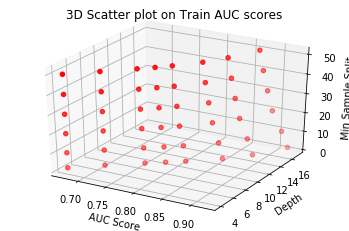

In [97]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

g1 = list(gs.cv_results_['mean_train_score'])     #Train AUC Score
g2 = [4,4,4,4,4,4,6,6,6,6,6,6,8,8,8,8,8,8,9,9,9,9,9,9,10,10,10,10,10,10,12,12,12,12,12,12,14,14,14,14,14,14,17,17,17,17,17,17]       #Depth
g3 = [2,10,20,30,40,50,2,10,20,30,40,50,2,10,20,30,40,50,2,10,20,30,40,50,2,10,20,30,40,50,2,10,20,30,40,50,2,10,20,30,40,50,2,10,20,30,40,50]      #Min Sample Split



ax.scatter(g1, g2, g3, c='r', marker='o')

ax.set_xlabel('AUC Score')
ax.set_ylabel('Depth')
ax.set_zlabel('Min Sample Split')

plt.title('3D Scatter plot on Train AUC scores')
plt.show()

## 3D Scatter plot for Cross-Validation AUC

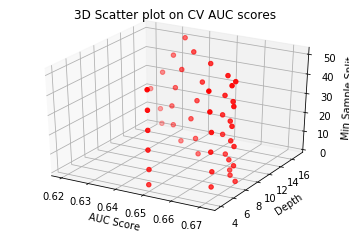

In [98]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

g1 = list(gs.cv_results_['mean_test_score'])    #Train AUC Score
g2 = [4,4,4,4,4,4,6,6,6,6,6,6,8,8,8,8,8,8,9,9,9,9,9,9,10,10,10,10,10,10,12,12,12,12,12,12,14,14,14,14,14,14,17,17,17,17,17,17]       #Depth
g3 = [2,10,20,30,40,50,2,10,20,30,40,50,2,10,20,30,40,50,2,10,20,30,40,50,2,10,20,30,40,50,2,10,20,30,40,50,2,10,20,30,40,50,2,10,20,30,40,50]      #Min Sample Split



ax.scatter(g1, g2, g3, c='r', marker='o')

ax.set_xlabel('AUC Score')
ax.set_ylabel('Depth')
ax.set_zlabel('Min Sample Split')

plt.title('3D Scatter plot on CV AUC scores')
plt.show()

## Heatmap for Train and CV AUC

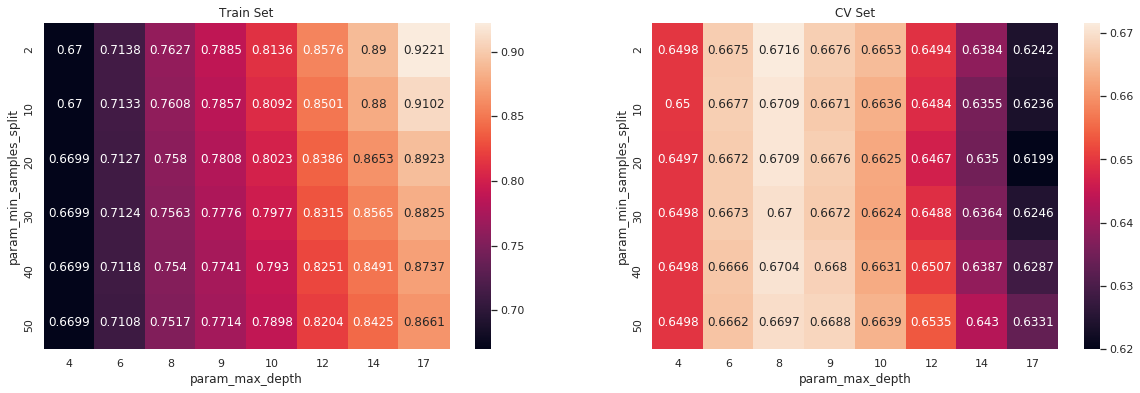

In [99]:
import seaborn as sns; sns.set()
max_scores1 = pd.DataFrame(gs.cv_results_).groupby(['param_min_samples_split', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()

### Train the model using the best hyperparameter obtained from GridSearchCV

In [100]:
gs_results.best_params_

{'max_depth': 8, 'min_samples_split': 2}

In [101]:
max_d = gs_results.best_params_['max_depth']
min_samp_splt = gs_results.best_params_['min_samples_split']

In [102]:
def pred_prob(clf, data): 
    y_pred = []
    y_pred = clf.predict_proba(data)[:,1]
    return y_pred

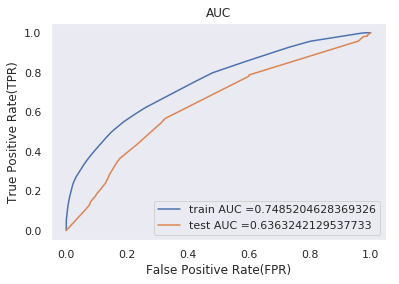

In [103]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

dtree = DecisionTreeClassifier(max_depth = max_d, min_samples_split = min_samp_splt ,class_weight='balanced')
dtree.fit(X_train,y_train)
    
y_train_pred = pred_prob(dtree,X_train)
y_test_pred = pred_prob(dtree,X_test)
    
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.close
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("AUC")
plt.grid()
plt.show()

### Confusion Matrix of Train and Test data

In [104]:
# we are writing our own function for predict, with defined threshold
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshold, fpr, tpr):
    t = threshold[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshold):
    predictions = []
    for i in proba:
        if i>=threshold:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions


In [105]:
#our objective here is to make auc the maximum
#so we find  the best threshold that will give the least fpr
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.45978963934489286 for threshold 0.469
Train confusion matrix
[[ 3826  1342]
 [10736 17596]]


Train data confusion matrix


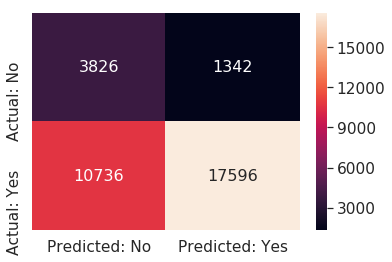

In [106]:
#plotting confusion matrix using seaborn's heatmap
# https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

print("Train data confusion matrix")

confusion_matrix_df_train = pd.DataFrame(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)), ['Actual: No','Actual: Yes'],['Predicted: No','Predicted: Yes'])
sns.set(font_scale=1.4)#for label size
sns.heatmap(confusion_matrix_df_train, annot=True,annot_kws={"size": 16}, fmt='g')

In [107]:
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

Test confusion matrix
[[1718  828]
 [6051 7903]]


Test data confusion matrix


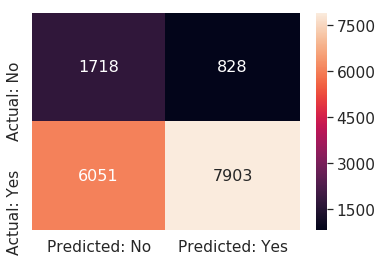

In [108]:
print("Test data confusion matrix")

confusion_matrix_df_test = pd.DataFrame(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)), ['Actual: No','Actual: Yes'],['Predicted: No','Predicted: Yes'])
sns.set(font_scale=1.4)#for label size
sns.heatmap(confusion_matrix_df_test, annot=True,annot_kws={"size": 16}, fmt='g')

### Word cloud of False positive word essays(from Test Data)

In [109]:
predicted_out = predict_with_best_t(y_test_pred, best_t)

In [110]:
len(predicted_out)

16500

In [111]:
len(y_test)

16500

In [112]:
#Actual vs predicted class labels in Test Data
act_vs_predicted = pd.DataFrame({'index':y_test.index, 'actual_label':y_test.values,'predicted_label':predicted_out})
act_vs_predicted.head()

index  actual_label  predicted_label
0  17984             1                1
1  32109             1                1
2  18442             1                1
3  12013             1                1
4  45615             1                0

In [113]:
fp = []
for i in tqdm(range(len(act_vs_predicted))):
    if(act_vs_predicted['actual_label'][i]==0 and act_vs_predicted['predicted_label'][i]==1 ):
        fp.append(act_vs_predicted['index'][i])

len(fp)

100%|██████████| 16500/16500 [00:00<00:00, 90061.46it/s]


828

In [114]:
#https://stackoverflow.com/questions/5419204/index-of-duplicates-items-in-a-python-list
def word_index(lst,item):
    return [i for i, x in enumerate(lst) if x == item]


In [115]:
fp_index = []
for i in range(len(fp)):
    test_id = project_data.iloc[fp[i]]['id']
    idx = project_data_test.loc[project_data_test['id']==test_id].index.values[0]
    fp_index.append(idx)

In [116]:
essay_bow_features = vectorizer_bow_essay.get_feature_names() 

In [117]:
len(essay_bow_features)

10358

In [118]:
fp_bow_essay_words = []
for i in fp_index:
    word_idx = word_index(essay_bow_test_list[i],1)
    for j in word_idx:
        fp_bow_essay_words.append(essay_bow_features[j])
        
    

In [119]:
fp_bow_essay_words = list(set(fp_bow_essay_words))

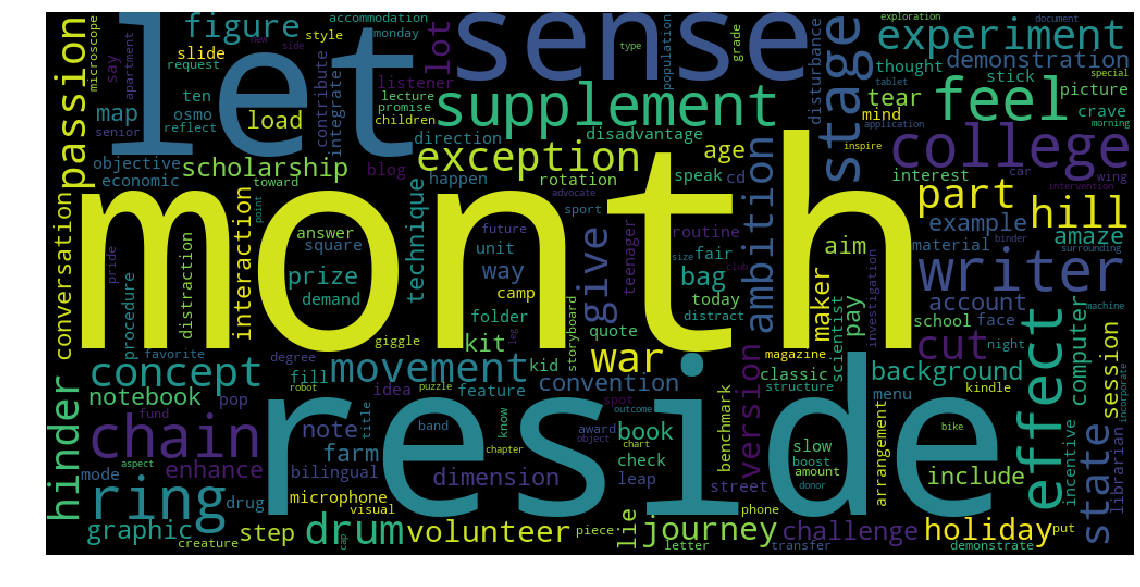

In [120]:
from wordcloud import WordCloud

unique_string=(" ").join(fp_bow_essay_words)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(25,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("fp_bow_essay_words"+".png", bbox_inches='tight')
plt.show()
plt.close()

### Box Plots of Cost per Rejected Project that got predicted as Accepted

In [121]:
fp_price_df = pd.DataFrame(project_data_test['price'])
fp_price_df_final = fp_price_df.iloc[fp_index,:]

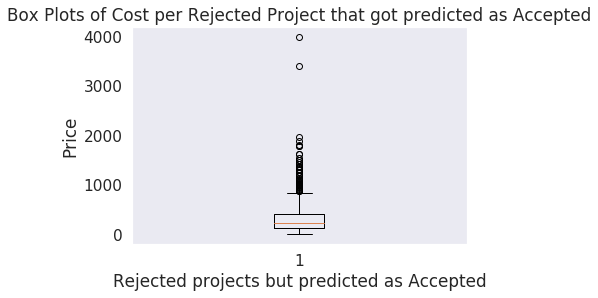

In [122]:
plt.boxplot(fp_price_df_final.values)
plt.title('Box Plots of Cost per Rejected Project that got predicted as Accepted')
plt.xlabel('Rejected projects but predicted as Accepted')
plt.ylabel('Price')
plt.grid()
plt.show()

### PDF with the Teacher_number_of_previously_posted_projects for the False Positive data points

In [123]:
fp_previous_projects_df = pd.DataFrame(project_data_test['teacher_number_of_previously_posted_projects'])
fp_previous_projects_df_final = fp_previous_projects_df.iloc[fp_index,:]

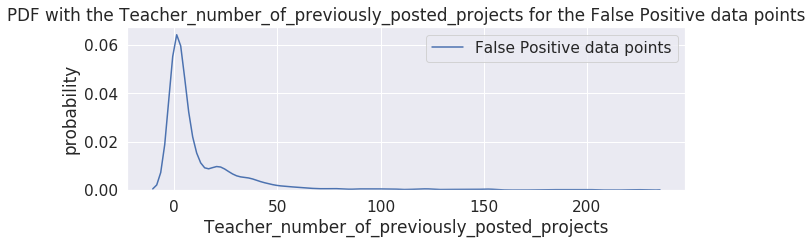

In [124]:
plt.figure(figsize=(10,3))
sns.distplot(fp_previous_projects_df_final.values, hist=False, label="False Positive data points")
plt.title('PDF with the Teacher_number_of_previously_posted_projects for the False Positive data points')
plt.xlabel('Teacher_number_of_previously_posted_projects')
plt.ylabel('probability')
plt.legend()
plt.show()

## Set 2: categorical, numerical features + project_title(TFIDF) + preprocessed_essay (TFIDF)

In [125]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_train = hstack((train_categories_one_hot, train_subcategories_one_hot, train_school_state_category_one_hot , train_project_grade_category_one_hot, train_teacher_prefix_categories_one_hot, price_normalized_train, quantity_normalized_train, previously_posted_projects_normalized_train, title_word_count_normalized_train, essay_word_count_normalized_train, sent_neg_train,sent_pos_train,sent_neu_train,sent_compound_train, train_title_tfidf, train_essay_tfidf)).tocsr()
X_test = hstack((test_categories_one_hot, test_subcategories_one_hot, test_school_state_category_one_hot , test_project_grade_category_one_hot, test_teacher_prefix_categories_one_hot, price_normalized_test, quantity_normalized_test, previously_posted_projects_normalized_test, title_word_count_normalized_test, essay_word_count_normalized_test,  sent_neg_test,sent_pos_test,sent_neu_test,sent_compound_test , test_title_tfidf, test_essay_tfidf)).tocsr()


In [126]:
print(X_train.shape)
print(X_test.shape)


(33500, 12011)
(16500, 12011)


### Graphviz visualization of Decision Tree on TFIDF,<font color='red'> SET 2</font>

In [127]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=3)

In [128]:
clf = dtree.fit(X_train, y_train)

In [129]:
#Since feature names are not obtained from word2vec related models, visualize only BOW & TFIDF decision trees using Graphviz
import graphviz
from sklearn import tree
from graphviz import Source

dot_data = tree.export_graphviz(dtree, out_file=None, feature_names=tfidf_features_names)
graph = graphviz.Source(dot_data) 
graph.render("Tfidf decision tree",view = True)

'Tfidf decision tree.pdf'

In [130]:
# https://medium.com/@erikgreenj/k-neighbors-classifier-with-gridsearchcv-basics-3c445ddeb657

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier


dtree = DecisionTreeClassifier(class_weight='balanced')
grid_params = {'max_depth':[4,6, 8, 9,10,12,14,17], 'min_samples_split': [2,10,20,30,40,50]}
gs = GridSearchCV(dtree, grid_params, cv=3, scoring='roc_auc')
gs_results = gs.fit(X_train, y_train)
print(gs_results.best_score_)
print(gs_results.best_estimator_)
print(gs_results.best_params_)

0.6698973282085461
DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=50,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
{'max_depth': 8, 'min_samples_split': 50}


In [131]:
#Output of GridSearchCV
print('Best score: ',gs_results.best_score_)
print('k value with best score: ',gs_results.best_params_)
print('='*75)
print('Train AUC scores')
print(gs.cv_results_['mean_train_score'])
print('CV AUC scores')
print(gs.cv_results_['mean_test_score'])

Best score:  0.6698973282085461
k value with best score:  {'max_depth': 8, 'min_samples_split': 50}
Train AUC scores
[0.6709766  0.6709766  0.67092371 0.67067711 0.67067711 0.67067711
 0.71683545 0.71636852 0.71580265 0.71455574 0.71442458 0.71424439
 0.76779257 0.76610274 0.76314384 0.76029467 0.75857855 0.75714212
 0.79387011 0.79104082 0.78635616 0.78280461 0.78006028 0.77836426
 0.81640777 0.81311956 0.80689254 0.80164509 0.7982383  0.79536653
 0.85838901 0.85266642 0.8429724  0.83618072 0.83189602 0.82715658
 0.89096799 0.88286811 0.87050512 0.86193115 0.8553679  0.84996258
 0.92273765 0.91277322 0.89839486 0.88701802 0.87964271 0.87295226]
CV AUC scores
[0.64688387 0.64688387 0.64693623 0.64691744 0.64698791 0.64698791
 0.66746437 0.66615008 0.66611521 0.66632351 0.66566246 0.66598112
 0.66908542 0.6680744  0.6685252  0.66847505 0.66971151 0.66989733
 0.66611699 0.66489959 0.66506269 0.66479308 0.66665871 0.66834199
 0.66360311 0.66156569 0.66163334 0.66326258 0.66440163 0.664960

### 3D Scatter plot on Train AUC scores

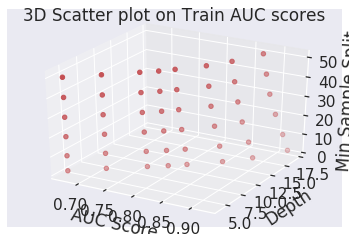

In [132]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

g1 = list(gs.cv_results_['mean_train_score'])     #Train AUC Score
g2 = [4,4,4,4,4,4,6,6,6,6,6,6,8,8,8,8,8,8,9,9,9,9,9,9,10,10,10,10,10,10,12,12,12,12,12,12,14,14,14,14,14,14,17,17,17,17,17,17]       #Depth
g3 = [2,10,20,30,40,50,2,10,20,30,40,50,2,10,20,30,40,50,2,10,20,30,40,50,2,10,20,30,40,50,2,10,20,30,40,50,2,10,20,30,40,50,2,10,20,30,40,50]      #Min Sample Split



ax.scatter(g1, g2, g3, c='r', marker='o')

ax.set_xlabel('AUC Score')
ax.set_ylabel('Depth')
ax.set_zlabel('Min Sample Split')

plt.title('3D Scatter plot on Train AUC scores')
plt.show()

### 3D Scatter plot on CV AUC scores

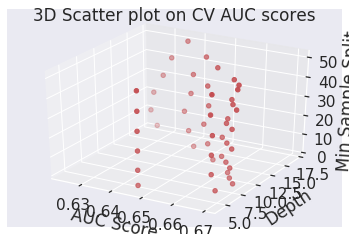

In [133]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

g1 = list(gs.cv_results_['mean_test_score'])    #Train AUC Score
g2 = [4,4,4,4,4,4,6,6,6,6,6,6,8,8,8,8,8,8,9,9,9,9,9,9,10,10,10,10,10,10,12,12,12,12,12,12,14,14,14,14,14,14,17,17,17,17,17,17]       #Depth
g3 = [2,10,20,30,40,50,2,10,20,30,40,50,2,10,20,30,40,50,2,10,20,30,40,50,2,10,20,30,40,50,2,10,20,30,40,50,2,10,20,30,40,50,2,10,20,30,40,50]      #Min Sample Split



ax.scatter(g1, g2, g3, c='r', marker='o')

ax.set_xlabel('AUC Score')
ax.set_ylabel('Depth')
ax.set_zlabel('Min Sample Split')

plt.title('3D Scatter plot on CV AUC scores')
plt.show()

### Heatmap for Train and CV AUC

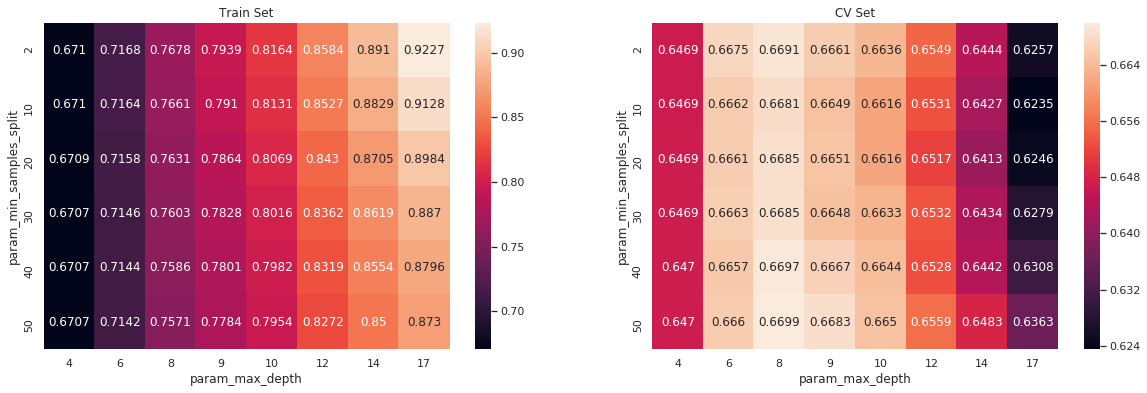

In [134]:
import seaborn as sns; sns.set()
max_scores1 = pd.DataFrame(gs.cv_results_).groupby(['param_min_samples_split', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()

### Train the model using the best hyperparameter obtained from GridSearchCV

In [135]:
gs_results.best_params_

{'max_depth': 8, 'min_samples_split': 50}

In [136]:
max_d = gs_results.best_params_['max_depth']
min_samp_splt = gs_results.best_params_['min_samples_split']

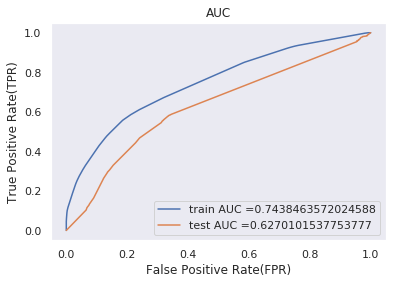

In [137]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

dtree = DecisionTreeClassifier(max_depth = max_d, min_samples_split = min_samp_splt ,class_weight='balanced')
dtree.fit(X_train,y_train)
    
y_train_pred = pred_prob(dtree,X_train)
y_test_pred = pred_prob(dtree,X_test)
    
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.close
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("AUC")
plt.grid()
plt.show()

### Confusion Matrix of Train and Test Data

In [138]:
#our objective here is to make auc the maximum
#so we find  the best threshold that will give the least fpr
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.46418575998914247 for threshold 0.447
Train confusion matrix
[[ 3923  1245]
 [11007 17325]]


Train data confusion matrix


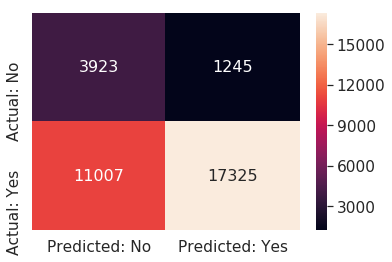

In [139]:
#plotting confusion matrix using seaborn's heatmap
# https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

print("Train data confusion matrix")

confusion_matrix_df_train = pd.DataFrame(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)), ['Actual: No','Actual: Yes'],['Predicted: No','Predicted: Yes'])
sns.set(font_scale=1.4)#for label size
sns.heatmap(confusion_matrix_df_train, annot=True,annot_kws={"size": 16}, fmt='g')

In [140]:
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

Test confusion matrix
[[1691  855]
 [5867 8087]]


Test data confusion matrix


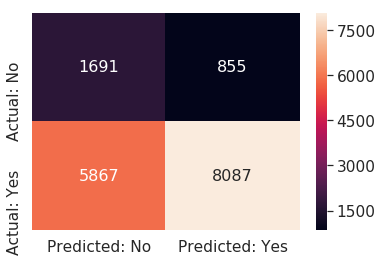

In [141]:
print("Test data confusion matrix")

confusion_matrix_df_test = pd.DataFrame(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)), ['Actual: No','Actual: Yes'],['Predicted: No','Predicted: Yes'])
sns.set(font_scale=1.4)#for label size
sns.heatmap(confusion_matrix_df_test, annot=True,annot_kws={"size": 16}, fmt='g')

### Word Cloud for False Positive word essays(from test data)

In [142]:
predicted_out = predict_with_best_t(y_test_pred, best_t)

In [143]:
#Actual vs predicted class labels in Test Data
act_vs_predicted = pd.DataFrame({'index':y_test.index, 'actual_label':y_test.values,'predicted_label':predicted_out})
act_vs_predicted.head()

index  actual_label  predicted_label
0  17984             1                1
1  32109             1                1
2  18442             1                1
3  12013             1                1
4  45615             1                0

In [144]:
fp = []
for i in tqdm(range(len(act_vs_predicted))):
    if(act_vs_predicted['actual_label'][i]==0 and act_vs_predicted['predicted_label'][i]==1 ):
        fp.append(act_vs_predicted['index'][i])

len(fp)

100%|██████████| 16500/16500 [00:00<00:00, 90317.68it/s]


855

In [145]:
fp_index = []
for i in range(len(fp)):
    test_id = project_data.iloc[fp[i]]['id']
    idx = project_data_test.loc[project_data_test['id']==test_id].index.values[0]
    fp_index.append(idx)

In [146]:
essay_tfidf_features = vectorizer_tfidf_essay.get_feature_names() 

In [147]:
len(essay_tfidf_features)

10358

In [148]:
len(essay_tfidf_test_list[0])

10358

In [149]:
#https://stackoverflow.com/questions/5419204/index-of-duplicates-items-in-a-python-list
def word_tfidf_index(lst):
    return [i for i, x in enumerate(lst) if x > 0]


In [150]:
fp_tfidf_essay_words = []
for i in fp_index:
    word_idx = word_tfidf_index(essay_tfidf_test_list[i])
    for j in word_idx:
        fp_tfidf_essay_words.append(essay_tfidf_features[j])    

In [151]:
fp_tfidf_essay_words

['100',
 '17',
 'ability',
 'able',
 'activities',
 'activity',
 'allows',
 'also',
 'apple',
 'area',
 'around',
 'basis',
 'best',
 'brains',
 'cared',
 'chairs',
 'choice',
 'classroom',
 'come',
 'comfortable',
 'complete',
 'component',
 'concept',
 'concepts',
 'cozy',
 'currently',
 'daily',
 'day',
 'eager',
 'education',
 'engagement',
 'enjoy',
 'ensure',
 'environment',
 'eye',
 'face',
 'favorite',
 'feel',
 'flexible',
 'free',
 'fun',
 'get',
 'grade',
 'hands',
 'high',
 'home',
 'however',
 'important',
 'incorporate',
 'incorporates',
 'increase',
 'ipads',
 'job',
 'learn',
 'learning',
 'love',
 'loved',
 'lunch',
 'many',
 'math',
 'mathematical',
 'need',
 'normal',
 'one',
 'options',
 'osmo',
 'parts',
 'perform',
 'poverty',
 'problems',
 'process',
 'quality',
 'read',
 'receive',
 'recently',
 'roles',
 'room',
 'school',
 'seating',
 'second',
 'smile',
 'solve',
 'spread',
 'started',
 'staying',
 'steam',
 'students',
 'system',
 'take',
 'task',
 'teacher'

In [152]:
fp_tfidf_essay_words = list(set(fp_tfidf_essay_words))

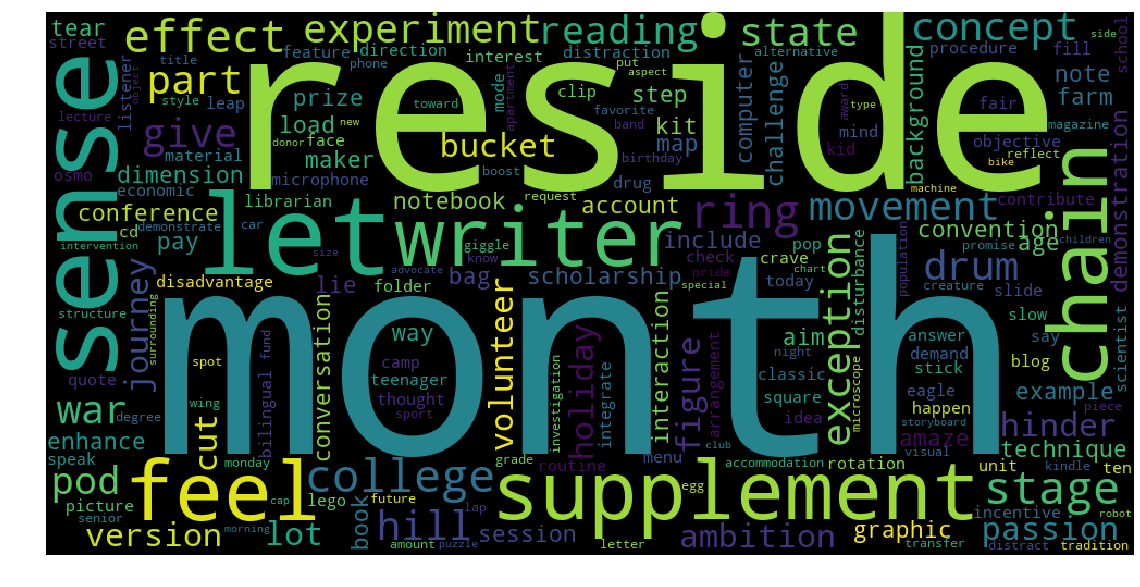

In [153]:
from wordcloud import WordCloud

unique_string=(" ").join(fp_tfidf_essay_words)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(25,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("fp_tfidf_essay_words"+".png", bbox_inches='tight')
plt.show()
plt.close()

### Box Plots of Cost per Rejected Project that got predicted as Accepted

In [154]:
fp_price_df = pd.DataFrame(project_data_test['price'])
fp_price_df_final = fp_price_df.iloc[fp_index,:]

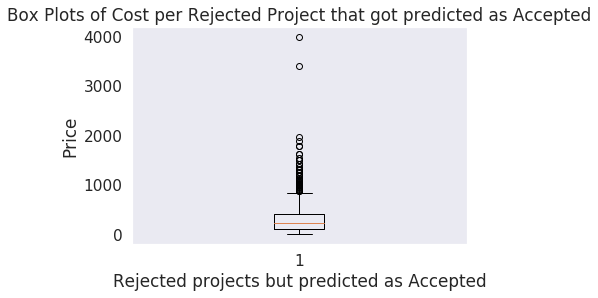

In [155]:
plt.boxplot(fp_price_df_final.values)
plt.title('Box Plots of Cost per Rejected Project that got predicted as Accepted')
plt.xlabel('Rejected projects but predicted as Accepted')
plt.ylabel('Price')
plt.grid()
plt.show()

### PDF with the Teacher_number_of_previously_posted_projects for the False Positive data points

In [156]:
fp_previous_projects_df = pd.DataFrame(project_data_test['teacher_number_of_previously_posted_projects'])
fp_previous_projects_df_final = fp_previous_projects_df.iloc[fp_index,:]

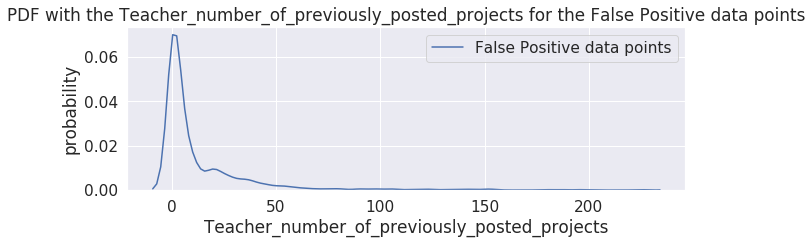

In [157]:
plt.figure(figsize=(10,3))
sns.distplot(fp_previous_projects_df_final.values, hist=False, label="False Positive data points")
plt.title('PDF with the Teacher_number_of_previously_posted_projects for the False Positive data points')
plt.xlabel('Teacher_number_of_previously_posted_projects')
plt.ylabel('probability')
plt.legend()
plt.show()

## Getting top 5k features using `feature_importances_` in set2(TFIDF)

In [158]:
fi_tfidf = dtree.feature_importances_

In [159]:
fi_tfidf

array([0., 0., 0., ..., 0., 0., 0.])

In [160]:
fi_tfidf_df = pd.DataFrame(fi_tfidf)

In [161]:
sorted_fi_tfidf_df = fi_tfidf_df.sort_values(by=0,ascending=False)

In [162]:
sorted_fi_tfidf_df = sorted_fi_tfidf_df[:5000]
top_5000_index = sorted_fi_tfidf_df.index.tolist()
len(top_5000_index)

5000

In [163]:
b = X_train.todense()
df_top_features_tfidf = pd.DataFrame(b)
#Extracting the top 5000 columns or features from all rows
df_top_features_tfidf = df_top_features_tfidf.iloc[:, top_5000_index]
df_top_features_tfidf.shape

(33500, 5000)

In [164]:
x = X_test.todense()
df_top_features_tfidf_te = pd.DataFrame(x)
#Extracting the top 5000 columns or features from all rows
df_top_features_tfidf_te = df_top_features_tfidf_te.iloc[:, top_5000_index]
df_top_features_tfidf_te.shape

(16500, 5000)

## Performing `Logistic Regression` on the data set formed with best 5000 features

In [165]:
# https://medium.com/@erikgreenj/k-neighbors-classifier-with-gridsearchcv-basics-3c445ddeb657

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(class_weight = 'balanced')
grid_params = {'C': [10**-4,0.0005,10**-3,0.002,0.003,0.004,0.005,0.008,0.01,0.03,0.06,0.09,10**-1,10**0,10**2,10**4]}
gs = GridSearchCV(lr, grid_params, cv=3, scoring='roc_auc')
gs_results = gs.fit(df_top_features_tfidf, y_train)
print(gs_results.best_score_)
print(gs_results.best_estimator_)
print(gs_results.best_params_)

0.6853026562798892
LogisticRegression(C=1, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)
{'C': 1}


### Train the model using the best hyperparameter obtained from GridSearchCV

In [166]:
best_c = gs_results.best_params_['C']

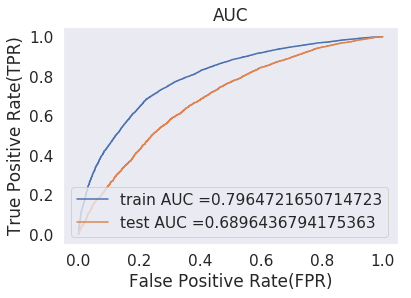

In [167]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

lr = LogisticRegression(C = best_c ,class_weight = 'balanced')
lr.fit(df_top_features_tfidf,y_train)
    
y_train_pred = pred_prob(lr,df_top_features_tfidf)
y_test_pred = pred_prob(lr,df_top_features_tfidf_te)
    
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.close()
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("AUC")
plt.grid()
plt.show()

### Confusion  Matrix of Train and Test data

In [168]:
#our objective here is to make auc the maximum
#so we find  the best threshold that will give the least fpr
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.533760057111411 for threshold 0.49
Train confusion matrix
[[ 3799  1369]
 [ 7760 20572]]


Train data confusion matrix


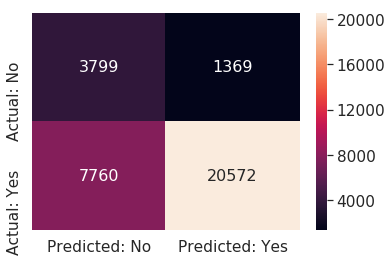

In [169]:
#plotting confusion matrix using seaborn's heatmap
# https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

print("Train data confusion matrix")

confusion_matrix_df_train = pd.DataFrame(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)), ['Actual: No','Actual: Yes'],['Predicted: No','Predicted: Yes'])
sns.set(font_scale=1.4)#for label size
sns.heatmap(confusion_matrix_df_train, annot=True,annot_kws={"size": 16}, fmt='g')

In [170]:
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

Test confusion matrix
[[1478 1068]
 [4186 9768]]


Test data confusion matrix


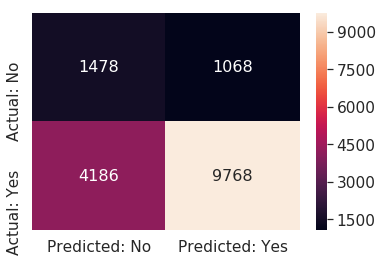

In [171]:
print("Test data confusion matrix")

confusion_matrix_df_test = pd.DataFrame(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)), ['Actual: No','Actual: Yes'],['Predicted: No','Predicted: Yes'])
sns.set(font_scale=1.4)#for label size
sns.heatmap(confusion_matrix_df_test, annot=True,annot_kws={"size": 16}, fmt='g')

## Set 3: categorical, numerical features + project_title(AVG W2V)+ preprocessed_essay (AVG W2V)

In [172]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_train = hstack((train_categories_one_hot, train_subcategories_one_hot, train_school_state_category_one_hot , train_project_grade_category_one_hot, train_teacher_prefix_categories_one_hot, price_normalized_train, quantity_normalized_train, previously_posted_projects_normalized_train, title_word_count_normalized_train, essay_word_count_normalized_train, sent_neg_train,sent_pos_train,sent_neu_train,sent_compound_train, train_avg_w2v_titles, train_avg_w2v_essays)).tocsr()
X_test = hstack((test_categories_one_hot, test_subcategories_one_hot, test_school_state_category_one_hot , test_project_grade_category_one_hot, test_teacher_prefix_categories_one_hot, price_normalized_test, quantity_normalized_test, previously_posted_projects_normalized_test, title_word_count_normalized_test, essay_word_count_normalized_test,  sent_neg_test,sent_pos_test,sent_neu_test,sent_compound_test , test_avg_w2v_titles, test_avg_w2v_essays )).tocsr()


In [173]:
print(X_train.shape)

print(X_test.shape)

(33500, 708)
(16500, 708)


In [174]:
# https://medium.com/@erikgreenj/k-neighbors-classifier-with-gridsearchcv-basics-3c445ddeb657

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier


dtree = DecisionTreeClassifier(class_weight='balanced')
grid_params = {'max_depth':[4,6, 8, 9,10,12,14,17], 'min_samples_split': [2,10,20,30,40,50]}
gs = GridSearchCV(dtree, grid_params, cv=3, scoring='roc_auc')
gs_results = gs.fit(X_train, y_train)
print(gs_results.best_score_)
print(gs_results.best_estimator_)
print(gs_results.best_params_)

0.6530152846317032
DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
{'max_depth': 6, 'min_samples_split': 20}


In [175]:
#Output of GridSearchCV
print('Best score: ',gs_results.best_score_)
print('k value with best score: ',gs_results.best_params_)
print('='*75)
print('Train AUC scores')
print(gs.cv_results_['mean_train_score'])
print('CV AUC scores')
print(gs.cv_results_['mean_test_score'])

Best score:  0.6530152846317032
k value with best score:  {'max_depth': 6, 'min_samples_split': 20}
Train AUC scores
[0.67643643 0.67643643 0.67643643 0.67643643 0.67643643 0.67643643
 0.73265491 0.73242654 0.7320415  0.73159428 0.73116523 0.73075157
 0.8074249  0.80694091 0.80459571 0.8023954  0.80038064 0.79820244
 0.84819587 0.84608131 0.84242307 0.83859515 0.8346117  0.8309452
 0.88413946 0.88200157 0.87489481 0.86788447 0.86252157 0.857184
 0.9322733  0.92820926 0.91640036 0.90589894 0.89737445 0.89061587
 0.95804637 0.95292296 0.93952117 0.92731763 0.91775734 0.90954104
 0.97631218 0.97126199 0.95866246 0.94601405 0.93557652 0.92667471]
CV AUC scores
[0.6457696  0.6457696  0.6457696  0.6457696  0.6457696  0.6457696
 0.65272882 0.65288318 0.65301528 0.65267108 0.6529166  0.65288971
 0.63032153 0.62969912 0.6296809  0.62965821 0.63005246 0.63062554
 0.61843772 0.61763046 0.61644287 0.61686448 0.61758103 0.61983971
 0.60546119 0.60398021 0.60359565 0.60321971 0.60504501 0.60804393
 

### 3D Scatter plot on Train AUC scores

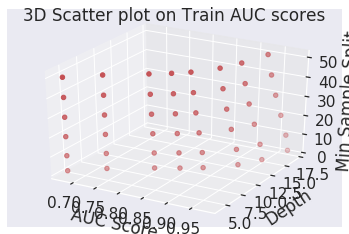

In [176]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

g1 = list(gs.cv_results_['mean_train_score'])     #Train AUC Score
g2 = [4,4,4,4,4,4,6,6,6,6,6,6,8,8,8,8,8,8,9,9,9,9,9,9,10,10,10,10,10,10,12,12,12,12,12,12,14,14,14,14,14,14,17,17,17,17,17,17]       #Depth
g3 = [2,10,20,30,40,50,2,10,20,30,40,50,2,10,20,30,40,50,2,10,20,30,40,50,2,10,20,30,40,50,2,10,20,30,40,50,2,10,20,30,40,50,2,10,20,30,40,50]      #Min Sample Split



ax.scatter(g1, g2, g3, c='r', marker='o')

ax.set_xlabel('AUC Score')
ax.set_ylabel('Depth')
ax.set_zlabel('Min Sample Split')

plt.title('3D Scatter plot on Train AUC scores')
plt.show()

### Heat Map for Train AUC

### 3D Scatter plot on CV AUC scores

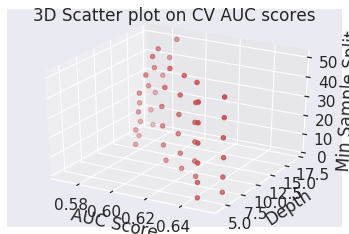

In [177]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

g1 = list(gs.cv_results_['mean_test_score'])    #Train AUC Score
g2 = [4,4,4,4,4,4,6,6,6,6,6,6,8,8,8,8,8,8,9,9,9,9,9,9,10,10,10,10,10,10,12,12,12,12,12,12,14,14,14,14,14,14,17,17,17,17,17,17]       #Depth
g3 = [2,10,20,30,40,50,2,10,20,30,40,50,2,10,20,30,40,50,2,10,20,30,40,50,2,10,20,30,40,50,2,10,20,30,40,50,2,10,20,30,40,50,2,10,20,30,40,50]      #Min Sample Split



ax.scatter(g1, g2, g3, c='r', marker='o')

ax.set_xlabel('AUC Score')
ax.set_ylabel('Depth')
ax.set_zlabel('Min Sample Split')

plt.title('3D Scatter plot on CV AUC scores')
plt.show()

### Heat Map for Train Cross Validation AUC

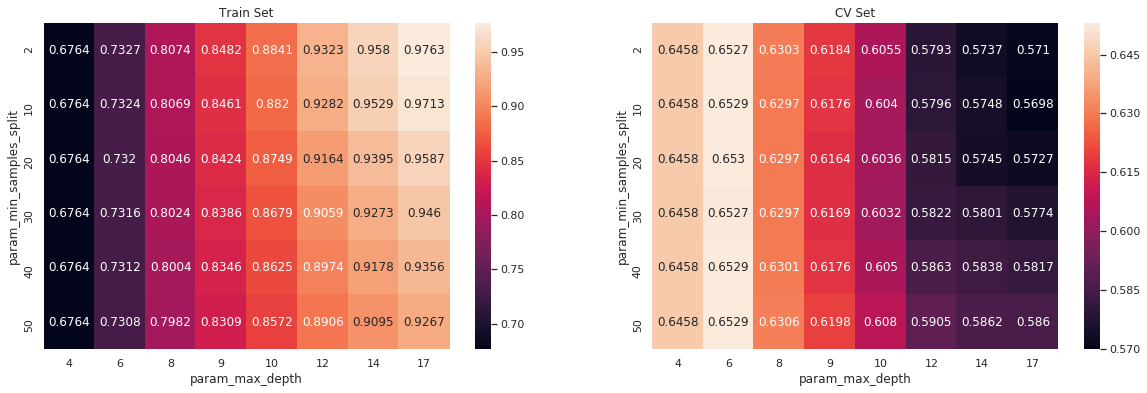

In [178]:
import seaborn as sns; sns.set()
max_scores1 = pd.DataFrame(gs.cv_results_).groupby(['param_min_samples_split', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()

### Train the model using the best hyperparameter obtained from GridSearchCV

In [179]:
gs_results.best_params_

{'max_depth': 6, 'min_samples_split': 20}

In [180]:
max_d = gs_results.best_params_['max_depth']
min_samp_splt = gs_results.best_params_['min_samples_split']

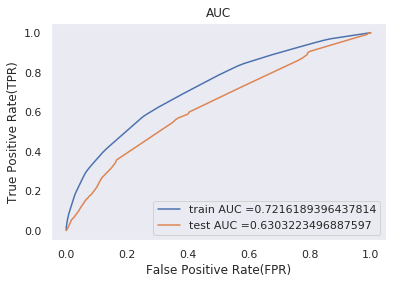

In [181]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

dtree = DecisionTreeClassifier(max_depth = max_d, min_samples_split = min_samp_splt ,class_weight='balanced')
dtree.fit(X_train,y_train)
    
y_train_pred = pred_prob(dtree,X_train)
y_test_pred = pred_prob(dtree,X_test)
    
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.close
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("AUC")
plt.grid()
plt.show()

### Confusion Matrix of Train and Test Data

In [182]:
#our objective here is to make auc the maximum
#so we find  the best threshold that will give the least fpr
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.43468103652883605 for threshold 0.477
Train confusion matrix
[[ 3606  1562]
 [10682 17650]]


Train data confusion matrix


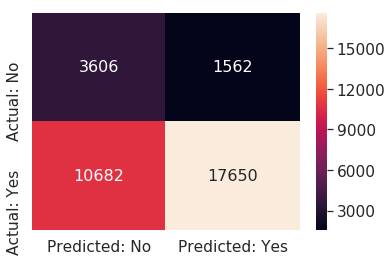

In [183]:
#plotting confusion matrix using seaborn's heatmap
# https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

print("Train data confusion matrix")

confusion_matrix_df_train = pd.DataFrame(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)), ['Actual: No','Actual: Yes'],['Predicted: No','Predicted: Yes'])
sns.set(font_scale=1.4)#for label size
sns.heatmap(confusion_matrix_df_train, annot=True,annot_kws={"size": 16}, fmt='g')

In [184]:
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

Test confusion matrix
[[1523 1023]
 [5668 8286]]


Test data confusion matrix


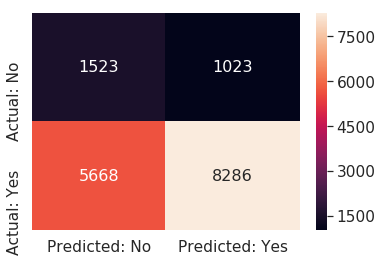

In [185]:
print("Test data confusion matrix")

confusion_matrix_df_test = pd.DataFrame(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)), ['Actual: No','Actual: Yes'],['Predicted: No','Predicted: Yes'])
sns.set(font_scale=1.4)#for label size
sns.heatmap(confusion_matrix_df_test, annot=True,annot_kws={"size": 16}, fmt='g')

## Set 4: categorical, numerical features + project_title(TFIDF W2V)+ preprocessed_essay (TFIDF W2V)

In [186]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_train = hstack((train_categories_one_hot, train_subcategories_one_hot, train_school_state_category_one_hot , train_project_grade_category_one_hot, train_teacher_prefix_categories_one_hot, price_normalized_train, quantity_normalized_train, previously_posted_projects_normalized_train, title_word_count_normalized_train, essay_word_count_normalized_train, sent_neg_train,sent_pos_train,sent_neu_train,sent_compound_train, train_tfidf_w2v_titles, train_tfidf_w2v_essays)).tocsr()
X_test = hstack((test_categories_one_hot, test_subcategories_one_hot, test_school_state_category_one_hot , test_project_grade_category_one_hot, test_teacher_prefix_categories_one_hot, price_normalized_test, quantity_normalized_test, previously_posted_projects_normalized_test, title_word_count_normalized_test, essay_word_count_normalized_test,  sent_neg_test,sent_pos_test,sent_neu_test,sent_compound_test , test_tfidf_w2v_titles, test_tfidf_w2v_essays)).tocsr()


In [187]:
print(X_train.shape)
print(X_test.shape)

(33500, 708)
(16500, 708)


In [188]:
# https://medium.com/@erikgreenj/k-neighbors-classifier-with-gridsearchcv-basics-3c445ddeb657

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier


dtree = DecisionTreeClassifier(class_weight='balanced')
grid_params = {'max_depth':[4,6, 8, 9,10,12,14,17], 'min_samples_split': [2,10,20,30,40,50]}
gs = GridSearchCV(dtree, grid_params, cv=3, scoring='roc_auc')
gs_results = gs.fit(X_train, y_train)
print(gs_results.best_score_)
print(gs_results.best_estimator_)
print(gs_results.best_params_)

0.6378528979396312
DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
{'max_depth': 6, 'min_samples_split': 10}


In [189]:
#Output of GridSearchCV
print('Best score: ',gs_results.best_score_)
print('k value with best score: ',gs_results.best_params_)
print('='*75)
print('Train AUC scores')
print(gs.cv_results_['mean_train_score'])
print('CV AUC scores')
print(gs.cv_results_['mean_test_score'])

Best score:  0.6378528979396312
k value with best score:  {'max_depth': 6, 'min_samples_split': 10}
Train AUC scores
[0.67632859 0.67632859 0.67632859 0.67632859 0.67632859 0.67632859
 0.73649139 0.73634658 0.73593787 0.73579768 0.73557732 0.73557732
 0.81213392 0.81092029 0.8067085  0.80544345 0.80292482 0.80153061
 0.8494894  0.8466917  0.84060299 0.83719361 0.83293346 0.82952333
 0.88080829 0.87724816 0.86895884 0.86309536 0.85738288 0.85327497
 0.9292977  0.92389274 0.91203792 0.90311039 0.89429073 0.88811743
 0.95496662 0.94870709 0.93566373 0.92545717 0.91529019 0.9082722
 0.97339652 0.96836634 0.95574425 0.94541644 0.93480481 0.92708089]
CV AUC scores
[0.63780396 0.63780396 0.63780396 0.63780396 0.63780396 0.63780396
 0.63773593 0.6378529  0.63722703 0.63737382 0.63726484 0.63726484
 0.62059344 0.62164011 0.61996867 0.62033269 0.61969053 0.62056034
 0.6140794  0.61340011 0.61182247 0.61213651 0.61069778 0.6119863
 0.60246876 0.60369285 0.60153494 0.60166375 0.6024762  0.60628012

### 3D Scatter plot on Train AUC scores

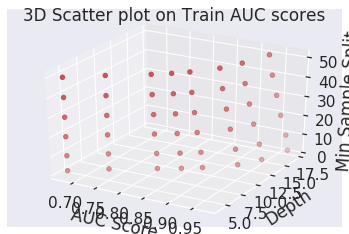

In [190]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

g1 = list(gs.cv_results_['mean_train_score'])     #Train AUC Score
g2 = [4,4,4,4,4,4,6,6,6,6,6,6,8,8,8,8,8,8,9,9,9,9,9,9,10,10,10,10,10,10,12,12,12,12,12,12,14,14,14,14,14,14,17,17,17,17,17,17]       #Depth
g3 = [2,10,20,30,40,50,2,10,20,30,40,50,2,10,20,30,40,50,2,10,20,30,40,50,2,10,20,30,40,50,2,10,20,30,40,50,2,10,20,30,40,50,2,10,20,30,40,50]      #Min Sample Split



ax.scatter(g1, g2, g3, c='r', marker='o')

ax.set_xlabel('AUC Score')
ax.set_ylabel('Depth')
ax.set_zlabel('Min Sample Split')

plt.title('3D Scatter plot on Train AUC scores')
plt.show()

### 3D Scatter plot on CV AUC scores

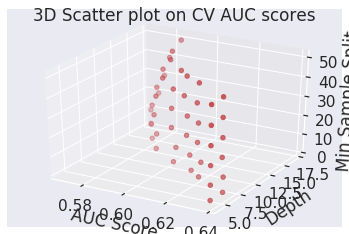

In [191]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

g1 = list(gs.cv_results_['mean_test_score'])    #Train AUC Score
g2 = [4,4,4,4,4,4,6,6,6,6,6,6,8,8,8,8,8,8,9,9,9,9,9,9,10,10,10,10,10,10,12,12,12,12,12,12,14,14,14,14,14,14,17,17,17,17,17,17]       #Depth
g3 = [2,10,20,30,40,50,2,10,20,30,40,50,2,10,20,30,40,50,2,10,20,30,40,50,2,10,20,30,40,50,2,10,20,30,40,50,2,10,20,30,40,50,2,10,20,30,40,50]      #Min Sample Split



ax.scatter(g1, g2, g3, c='r', marker='o')

ax.set_xlabel('AUC Score')
ax.set_ylabel('Depth')
ax.set_zlabel('Min Sample Split')

plt.title('3D Scatter plot on CV AUC scores')
plt.show()

### Heat Map for Train and  Cross Validation AUC

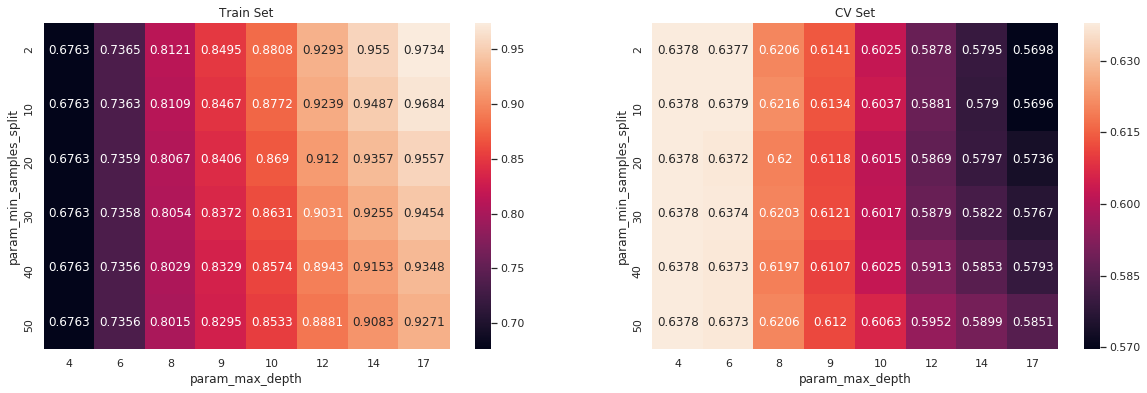

In [192]:
import seaborn as sns; sns.set()
max_scores1 = pd.DataFrame(gs.cv_results_).groupby(['param_min_samples_split', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()

### Train the model using the best hyperparameter obtained from GridSearchCV

In [193]:
gs_results.best_params_

{'max_depth': 6, 'min_samples_split': 10}

In [194]:
max_d = gs_results.best_params_['max_depth']
min_samp_splt = gs_results.best_params_['min_samples_split']

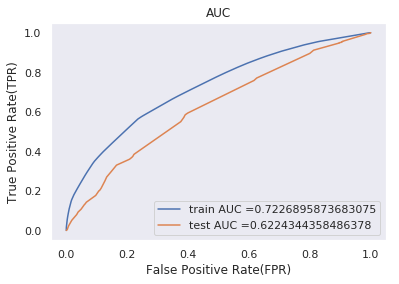

In [195]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

dtree = DecisionTreeClassifier(max_depth = max_d, min_samples_split = min_samp_splt ,class_weight='balanced')
dtree.fit(X_train,y_train)
    
y_train_pred = pred_prob(dtree,X_train)
y_test_pred = pred_prob(dtree,X_test)
    
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.close
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("AUC")
plt.grid()
plt.show()

### Confusion Matrix of Train and Test Data

In [196]:
#our objective here is to make auc the maximum
#so we find  the best threshold that will give the least fpr
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.4347659704109915 for threshold 0.47
Train confusion matrix
[[ 3808  1360]
 [11615 16717]]


Train data confusion matrix


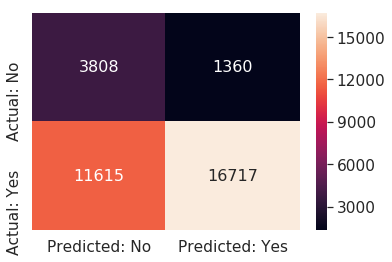

In [197]:
#plotting confusion matrix using seaborn's heatmap
# https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

print("Train data confusion matrix")

confusion_matrix_df_train = pd.DataFrame(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)), ['Actual: No','Actual: Yes'],['Predicted: No','Predicted: Yes'])
sns.set(font_scale=1.4)#for label size
sns.heatmap(confusion_matrix_df_train, annot=True,annot_kws={"size": 16}, fmt='g')

In [198]:
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

Test confusion matrix
[[1531 1015]
 [5672 8282]]


Test data confusion matrix


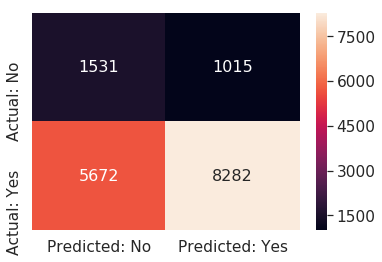

In [199]:
print("Test data confusion matrix")

confusion_matrix_df_test = pd.DataFrame(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)), ['Actual: No','Actual: Yes'],['Predicted: No','Predicted: Yes'])
sns.set(font_scale=1.4)#for label size
sns.heatmap(confusion_matrix_df_test, annot=True,annot_kws={"size": 16}, fmt='g')

<h1> Conclusion</h1>

In [200]:
# http://zetcode.com/python/prettytable/

from prettytable import PrettyTable

#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable

x = PrettyTable()
x.field_names = ["Vectorizer", "Model", "Hyperparameters(max depth,min samples split)", "Test AUC"]

x.add_row(["BOW", "Decision Trees","(8, 2)", 0.63])
x.add_row(["TFIDF", "Decision Trees", "(8, 50)", 0.627])
x.add_row(["AVG W2V", "Decision Trees", "(6, 20)", 0.63])
x.add_row(["TFIDF W2V", "Decision Trees", "(6, 10)", 0.62])
x.add_row(["TFIDF (with top 5k Features)", "Logistic Regression", "[alpha = 1]", 0.69])


print(x)

+------------------------------+---------------------+----------------------------------------------+----------+
|          Vectorizer          |        Model        | Hyperparameters(max depth,min samples split) | Test AUC |
+------------------------------+---------------------+----------------------------------------------+----------+
|             BOW              |    Decision Trees   |                    (8, 2)                    |   0.63   |
|            TFIDF             |    Decision Trees   |                   (8, 50)                    |  0.627   |
|           AVG W2V            |    Decision Trees   |                   (6, 20)                    |   0.63   |
|          TFIDF W2V           |    Decision Trees   |                   (6, 10)                    |   0.62   |
| TFIDF (with top 5k Features) | Logistic Regression |                 [alpha = 1]                  |   0.69   |
+------------------------------+---------------------+------------------------------------------